In [1]:
%%time
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Wall time: 6.72 s


In [2]:
%%time
paris_df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2021-10-09/data/listings.csv.gz")

Wall time: 15.4 s


Checking and getting rid of data blanks;

In [3]:
paris_df.shape

(49634, 74)

In [4]:
paris_df.isnull().sum().sort_values()

id                                  0
availability_30                     0
number_of_reviews                   0
neighbourhood_cleansed              0
calendar_last_scraped               0
                                ...  
host_response_rate              27210
host_response_time              27210
calendar_updated                49634
neighbourhood_group_cleansed    49634
bathrooms                       49634
Length: 74, dtype: int64

Some columns are entirely empty, some other are missing significant amount of data; decided to remove columns with treshold of 15% blanks

In [5]:
paris_df = paris_df.dropna(axis='columns', thresh=int(paris_df.shape[0] * 0.85))

Before potential blanks filling, checking if any other columns may be of no value for further analysis

In [6]:
pd.set_option('max_columns', None)
paris_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5396,https://www.airbnb.com/rooms/5396,20211009153557,2021-10-11,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"İstanbul, İstanbul, Turkey",f,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,Hôtel-de-Ville,48.85207,2.35871,Entire rental unit,Entire home/apt,2,1 bath,1.0,"[""Fire extinguisher"", ""Hangers"", ""Washer"", ""St...",$100.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,3,25,55,55,2021-10-11,263,35,2,f,1,1,0,0
1,7397,https://www.airbnb.com/rooms/7397,20211009153557,2021-10-11,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,Franck,2008-08-30,"Paris, Île-de-France, France",t,https://a0.muscache.com/im/pictures/user/58f00...,https://a0.muscache.com/im/pictures/user/58f00...,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Hôtel-de-Ville,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1 bath,2.0,"[""Hangers"", ""Washer"", ""Stove"", ""Bed linens"", ""...",$105.00,10,130,3.0,10.0,130.0,130.0,9.9,130.0,t,0,1,3,233,2021-10-11,282,13,4,f,1,1,0,0
2,7964,https://www.airbnb.com/rooms/7964,20211009153557,2021-10-10,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,https://a0.muscache.com/pictures/4471349/6fb3d...,22155,https://www.airbnb.com/users/show/22155,Anaïs,2009-06-18,"Paris, Île-de-France, France",f,https://a0.muscache.com/im/users/22155/profile...,https://a0.muscache.com/im/users/22155/profile...,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Opéra,48.87417,2.34245,Entire rental unit,Entire home/apt,2,1 bath,1.0,"[""Hangers"", ""Stove"", ""Bed linens"", ""Private pa...",$130.00,6,365,6.0,6.0,365.0,365.0,6.0,365.0,t,0,2,18,293,2021-10-10,6,0,0,f,1,1,0,0
3,9359,https://www.airbnb.com/rooms/9359,20211009153557,2021-10-11,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,https://a0.muscache.com/pictures/c2965945-061f...,28422,https://www.airbnb.com/users/show/28422,Bernadette,2009-07-29,"New York, New York, United States",f,https://a0.muscache.com/im/users/28422/profile...,https://a0.muscache.com/im/users/28422/profile...,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Louvre,48.85899,2.34735,Entire rental unit,Entire home/apt,2,1 bath,1.0,"[""Long term stays allowed"", ""Hair dryer"", ""Kit...",$75.00,180,365,180.0,180.0,365.0,365.0,180.0,365.0,t,0,0,0,58,2021-10-11,0,0,0,f,1,1,0,0
4,9952,https://www.airbnb.com/rooms/9952,20211009153557,2021-10-11,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...",https://a0.muscache.com/pictures/ae822d16-74d2...,33534,https://www.airbnb.com/users/show/33534,Elisabeth,2009-08-24,"Paris, Île-de-France, France",t,https://a0.muscache.com/im/picture

In [7]:
paris_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,4.963400e+04,4.963400e+04,4.963400e+04,49606.000000,49606.000000,49634.000000,49634.000000,49634.000000,49052.000000,49634.000000,4.963400e+04,49624.000000,49624.000000,4.962400e+04,4.962400e+04,49624.000000,4.962400e+04,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000
mean,2.612255e+07,2.021101e+13,9.711188e+07,12.992380,12.992380,48.863998,2.344889,3.055567,1.692204,111.961256,1.000286e+03,111.138381,113.402950,3.905154e+05,9.098377e+05,112.961071,8.248394e+05,4.862917,12.444373,21.356228,100.681569,21.131080,2.789016,0.452089,13.192167,12.459383,0.473385,0.021618
std,1.583070e+07,0.000000e+00,1.179651e+08,77.278735,77.278735,0.018146,0.033118,1.649358,1.393760,169.898643,4.488877e+04,169.687478,171.900095,2.891815e+07,4.416783e+07,171.628893,4.074739e+07,8.957372,19.953512,31.203345,134.541931,45.624607,11.946425,1.460585,47.381927,47.329952,2.229527,0.327695
min,5.396000e+03,2.021101e+13,2.626000e+03,0.000000,0.000000,48.812220,2.221440,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.216652e+07,2.021101e+13,1.321955e+07,1.000000,1.000000,48.850880,2.324130,2.000000,1.000000,2.000000,2.000000e+02,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,2.554130e+07,2.021101e+13,3.876027e+07,1.000000,1.000000,48.865330,2.347985,2.000000,1.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,4.031879e+07,2.021101e+13,1.437275e+08,2.000000,2.000000,48.878450,2.369280,4.000000,2.000000,365.000000,1.125000e+03,365.000000,365.000000,1.125000e+03,1.125000e+03,365.000000,1.125000e+03,5.000000,21.000000,40.000000,221.000000,21.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,5.269672e+07,2.021101e+13,4.263328e+08,1105.000000,1105.000000,48.905690,2.467120,16.000000,90.000000,9999.000000,1.000000e+07,9999.000000,9999.000000,2.147484e+09,2.147484e+09,9999.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,1711.000000,1644.000000,110.000000,382.000000,382.000000,30.000000,10.000000


In [8]:
# checking how many hosts are in the dataset and what would be a cost of one-hot encoding of this variable
len(pd.unique(paris_df['host_id']))

38581

In [9]:
# checking from how many locations hosts come
paris_df['host_location'].describe()

count                            49514
unique                            2217
top       Paris, Île-de-France, France
freq                             35669
Name: host_location, dtype: object

In [10]:
# it can be expected, that most of the hosts have pictures - checking if ones with no picture are outliers or more 
# significant group
paris_df['host_has_profile_pic'].describe()

count     49606
unique        2
top           t
freq      49384
Name: host_has_profile_pic, dtype: object

In [11]:
# the same as above
paris_df['host_identity_verified'].describe()

count     49606
unique        2
top           t
freq      39744
Name: host_identity_verified, dtype: object

In [12]:
# checking how many distinct values are in the column and if they could be one-hot encoded, used for text mining or they
# would not have a strong value for further analysis 
paris_df['property_type'].describe()

count                  49634
unique                    65
top       Entire rental unit
freq                   37799
Name: property_type, dtype: object

In [13]:
paris_df['amenities'].describe()

count                           49634
unique                          40351
top       ["Long term stays allowed"]
freq                              168
Name: amenities, dtype: object

In [14]:
paris_df['has_availability'].describe()

count     49634
unique        2
top           t
freq      48737
Name: has_availability, dtype: object

In [15]:
# list of columns that will be removed from dataset, based on planned investigation; numerical data and texts that can be
# used for text mining will be kept; 'id' will be kept for pulling data that has been initially removed - in case that would
# be needed; analysis has been supported with use of data dictionary provided: 
# https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896
columns_to_drop = [
    'listing_url', 'scrape_id', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
    'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',  'neighbourhood_cleansed', 'property_type',
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60',
    'availability_90', 'availability_365', 'calendar_last_scraped'
]

In [16]:
paris_df.drop(columns=columns_to_drop, inplace=True)

In [17]:
# another look at dataset
pd.set_option('max_columns', None)
paris_df.head()

,id,last_scraped,name,description,host_since,host_location,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5396,2021-10-11,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...",2009-02-14,"İstanbul, İstanbul, Turkey",f,1.0,t,48.85207,2.35871,Entire home/apt,2,1 bath,1.0,"[""Fire extinguisher"", ""Hangers"", ""Washer"", ""St...",$100.00,2,1125,263,35,2,f,1,1,0,0
1,7397,2021-10-11,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",2008-08-30,"Paris, Île-de-France, France",t,4.0,t,48.85909,2.35315,Entire home/apt,4,1 bath,2.0,"[""Hangers"", ""Washer"", ""Stove"", ""Bed linens"", ""...",$105.00,10,130,282,13,4,f,1,1,0,0
2,7964,2021-10-10,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,2009-06-18,"Paris, Île-de-France, France",f,0.0,t,48.87417,2.34245,Entire home/apt,2,1 bath,1.0,"[""Hangers"", ""Stove"", ""Bed linens"", ""Private pa...",$130.00,6,365,6,0,0,f,1,1,0,0
3,9359,2021-10-11,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,2009-07-29,"New York, New York, United States",f,3.0,t,48.85899,2.34735,Entire home/apt,2,1 bath,1.0,"[""Long term stays allowed"", ""Hair dryer"", ""Kit...",$75.00,180,365,0,0,0,f,1,1,0,0
4,9952,2021-10-11,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...",2009-08-24,"Paris, Île-de-France, France",t,1.0,t,48.86227,2.37134,Entire home/apt,2,1 bath,1.0,"[""Hangers"", ""Stove"", ""Bed linens"", ""Oven"", ""Di...",$80.00,4,31,32,7,1,f,1,1,0,0


In [18]:
# This section is intended to obtain city districts from coordinates, using geopy library; originally reverse geocoding -
# which is a relevant method for this task - has limitations: 1 request/second; ignoring this limit will cause blocking IP
# address in service; applying this limit would extend pulling data to tens of hours, which is inefficient. Running
# Nominatim service locally would possibly improve efficiency both by improving requests response time and removing limits,
# but I've decided to not focus on local Nominatim service configuration, as it exceeds this excercise expectations. Below 
# code is a scratch, that can be used to pull data from original Nominatim service, but   i t   d o e s n ' t   
# r e s p e c t   l i m i t s !   It will cause blocking an IP in service! See geopy documentation to learn limits 
# configuration

# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="geoapiExercises")

# reverse geocoding uses coordinates merged into one string:
# paris_df = paris_df.astype({'latitude': 'str', 'longitude': 'str'})
# paris_df['location_details'] = paris_df['latitude'] + ", " + paris_df['longitude']

# pulling address details object from Nominatim
# paris_df['location_details'] = paris_df['location_details'].apply(lambda row: geolocator.reverse(row))

# unpacking district info from address; note that in different cities district may be placed under different keys:
# paris_df['location_details'] = paris_df['location_details'].apply(lambda row: row.raw)
# paris_df['location_details'] = paris_df['location_details'].apply(lambda row: row['address'])
# paris_df['location_details'] = paris_df['location_details'].apply(lambda row: row.get('suburb'))

In [19]:
# recoding "t/f" values with 1 and 0
def recode_values(value):
    if value == "t":
        return 1
    else:
        return 0

In [20]:
paris_df['host_is_superhost'] = paris_df['host_is_superhost'].apply(recode_values)
paris_df['host_identity_verified'] = paris_df['host_identity_verified'].apply(recode_values)
paris_df['instant_bookable'] = paris_df['instant_bookable'].apply(recode_values)

In [21]:
# recoding "host_location" into "local_host" variable:
def recode_local_host(value):
    if value == 'Paris, Île-de-France, France':
        return 1
    else:
        return 0

In [22]:
paris_df['local_host'] = paris_df['host_location'].apply(recode_local_host)
paris_df.drop(columns='host_location', inplace=True)

In [23]:
# some columns with categories or embedded numerical data need to be transformed into plain numerical data, so they can be
# used in analysis
print(pd.unique(paris_df['room_type']))
print(pd.unique(paris_df['bathrooms_text']))

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
['1 bath' '1 private bath' '1.5 baths' '2 baths' '1 shared bath'
 '1.5 shared baths' nan '2.5 baths' '2 shared baths' '4 baths' 'Half-bath'
 '3 baths' '3.5 baths' '4.5 baths' 'Shared half-bath' '7 shared baths'
 '0 shared baths' '0 baths' '5 baths' 'Private half-bath'
 '2.5 shared baths' '6.5 shared baths' '6 baths' '8 baths'
 '3 shared baths' '7 baths' '50 baths' '6 shared baths' '5.5 baths'
 '3.5 shared baths' '6.5 baths' '8.5 baths' '29 baths' '23 baths']


In [24]:
# room_type values to be transformed into columns with binary values
binaries = pd.get_dummies(paris_df['room_type'])
paris_df = pd.concat((paris_df, binaries), axis=1)
paris_df.drop(columns='room_type', inplace=True)

In [25]:
# since number of bathrooms seems to not reflect the number of bathrooms assigned to the room (values from 0.5 up to dozens
# or even tens) only information regarding shared or private bathroom will be considered (assuming that bathroom with no
# adjective will be considered as a private one). Private is 1 and shared is 0.
def bathroom(value):
    if "hared" in value:  # simply solves problem of capital "S" in word "Shared" without additional operations ;)
        return 0
    elif value == "0":
        return 0    
    else:
        return 1

In [26]:
# here bathrooms text info will be replaced with with numerical value for not shared bathroom assigned to each offer
paris_df['bathrooms_text'] = paris_df['bathrooms_text'].fillna(0)
paris_df['bathrooms_text'] = paris_df['bathrooms_text'].astype(str)
paris_df['bathrooms_text'] = paris_df['bathrooms_text'].apply(bathroom)
paris_df.drop(columns='bathrooms_text', inplace=True)

In [27]:
# fixing obtained columns names
cols_replace = {
    'Entire home/apt': 'entire_home_apt', 'Hotel room': 'hotel_room', 'Private room': 'private_room', 
    'Shared room': 'shared_room'
}

paris_df.rename(columns=cols_replace, inplace=True)

In [28]:
# date values are transformed into time difference between event occurence and time of pulling dataset from source,
# expressed in days

paris_df['last_scraped'] = pd.to_datetime(paris_df['last_scraped'], dayfirst=True)
paris_df['host_since'] = pd.to_datetime(paris_df['host_since'], dayfirst=True)

paris_df['host_days'] = (paris_df['last_scraped'] - paris_df['host_since']).dt.days

paris_df.drop(columns=['host_since', 'last_scraped'], inplace=True)

Investigating variables with blanks for chooosing the method for filling them

In [29]:
paris_df.isnull().any()

id                                              False
name                                             True
description                                      True
host_is_superhost                               False
host_listings_count                              True
host_identity_verified                          False
latitude                                        False
longitude                                       False
accommodates                                    False
beds                                             True
amenities                                       False
price                                           False
minimum_nights                                  False
maximum_nights                                  False
number_of_reviews                               False
number_of_reviews_ltm                           False
number_of_reviews_l30d                          False
instant_bookable                                False
calculated_host_listings_cou

<AxesSubplot:xlabel='host_listings_count', ylabel='Count'>

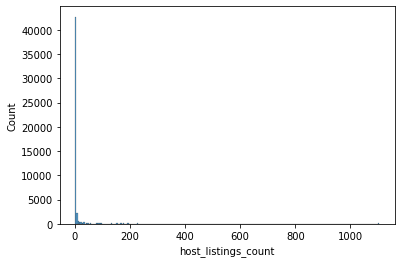

In [30]:
sns.histplot(data=paris_df, x='host_listings_count', binwidth=5)

In [31]:
paris_df['host_listings_count'].describe()

count    49606.000000
mean        12.992380
std         77.278735
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1105.000000
Name: host_listings_count, dtype: float64

<AxesSubplot:xlabel='beds', ylabel='Count'>

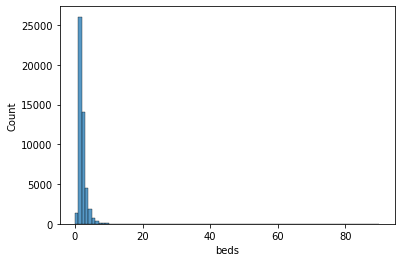

In [32]:
sns.histplot(data=paris_df, x='beds', binwidth=1)

In [33]:
paris_df['beds'].describe()

count    49052.000000
mean         1.692204
std          1.393760
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         90.000000
Name: beds, dtype: float64

<AxesSubplot:xlabel='host_days', ylabel='Count'>

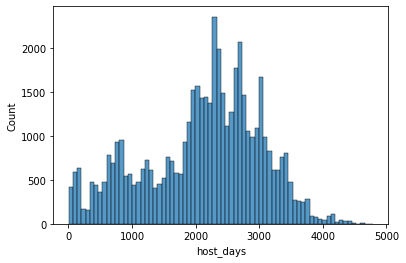

In [34]:
sns.histplot(data=paris_df, x='host_days')

In [35]:
paris_df['host_days'].describe()

count    49606.000000
mean      2113.624824
std        920.826216
min          4.000000
25%       1526.000000
50%       2272.000000
75%       2757.000000
max       4790.000000
Name: host_days, dtype: float64

In [36]:
# 'name' and 'description' variables are text ones and missing values won't be replaced; 'host_listings_count' and 'beds'
# have extreme outliers and gaps will be filled with median (another reason is that they're integers); 'host_days' is more
# harmonized and missing values will be filled with mean
paris_df['host_listings_count'].fillna(paris_df['host_listings_count'].median(), inplace = True)
paris_df['beds'].fillna(paris_df['beds'].median(), inplace = True)
paris_df['host_days'].fillna(paris_df['host_days'].median(), inplace = True)

In [37]:
# 'price' is not expressed as number, so it has to be transformed into number for further analysis 
paris_df['price'] = paris_df['price'].map(lambda x: x.lstrip('$').replace(",", ""))

In [38]:
# another glance at data after transformations applied
pd.set_option('max_columns', None)
paris_df.head()

,id,name,description,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,local_host,entire_home_apt,hotel_room,private_room,shared_room,host_days
0,5396,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...",0,1.0,1,48.85207,2.35871,2,1.0,"[""Fire extinguisher"", ""Hangers"", ""Washer"", ""St...",100.00,2,1125,263,35,2,0,1,1,0,0,0,1,0,0,0,4622.0
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",1,4.0,1,48.85909,2.35315,4,2.0,"[""Hangers"", ""Washer"", ""Stove"", ""Bed linens"", ""...",105.00,10,130,282,13,4,0,1,1,0,0,1,1,0,0,0,4790.0
2,7964,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,0,0.0,1,48.87417,2.34245,2,1.0,"[""Hangers"", ""Stove"", ""Bed linens"", ""Private pa...",130.00,6,365,6,0,0,0,1,1,0,0,1,1,0,0,0,4497.0
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,0,3.0,1,48.85899,2.34735,2,1.0,"[""Long term stays allowed"", ""Hair dryer"", ""Kit...",75.00,180,365,0,0,0,0,1,1,0,0,0,1,0,0,0,4457.0
4,9952,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...",1,1.0,1,48.86227,2.37134,2,1.0,"[""Hangers"", ""Stove"", ""Bed linens"", ""Oven"", ""Di...",80.00,4,31,32,7,1,0,1,1,0,0,1,1,0,0,0,4431.0


In [39]:
# some variables are still expressed as floats, while integer would be enough; ensuring that all of the numerical variables
# have proper format
cols_no_price = [
    'host_is_superhost', 'host_listings_count', 'host_identity_verified', 'accommodates', 'beds', 'minimum_nights',
    'maximum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable', 
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'local_host',
    'entire_home_apt', 'hotel_room', 'private_room', 'shared_room', 'host_days'
]

paris_df[cols_no_price] = paris_df[cols_no_price].astype(int)
paris_df['price'] = paris_df['price'].astype(float)

In [40]:
# final look at the dataset prepared for further analyses
pd.set_option('max_columns', None)
paris_df.head()

,id,name,description,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,local_host,entire_home_apt,hotel_room,private_room,shared_room,host_days
0,5396,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...",0,1,1,48.85207,2.35871,2,1,"[""Fire extinguisher"", ""Hangers"", ""Washer"", ""St...",100.0,2,1125,263,35,2,0,1,1,0,0,0,1,0,0,0,4622
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",1,4,1,48.85909,2.35315,4,2,"[""Hangers"", ""Washer"", ""Stove"", ""Bed linens"", ""...",105.0,10,130,282,13,4,0,1,1,0,0,1,1,0,0,0,4790
2,7964,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,0,0,1,48.87417,2.34245,2,1,"[""Hangers"", ""Stove"", ""Bed linens"", ""Private pa...",130.0,6,365,6,0,0,0,1,1,0,0,1,1,0,0,0,4497
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,0,3,1,48.85899,2.34735,2,1,"[""Long term stays allowed"", ""Hair dryer"", ""Kit...",75.0,180,365,0,0,0,0,1,1,0,0,0,1,0,0,0,4457
4,9952,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...",1,1,1,48.86227,2.37134,2,1,"[""Hangers"", ""Stove"", ""Bed linens"", ""Oven"", ""Di...",80.0,4,31,32,7,1,0,1,1,0,0,1,1,0,0,0,4431


Looking for and pruning variables with outliers before further analysis

<AxesSubplot:xlabel='host_listings_count', ylabel='host_listings_count'>

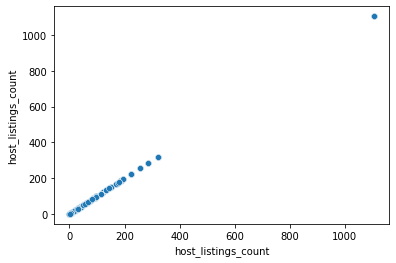

In [41]:
sns.scatterplot(data=paris_df, x="host_listings_count", y="host_listings_count")

In [42]:
# iterating through different values of variable and checking the effect on histogram above until obtaining more 
# harmonized profile
pruned_paris_df = paris_df[(paris_df['host_listings_count'] <= 5) & (paris_df['host_listings_count'] > 0)]

<AxesSubplot:xlabel='host_listings_count', ylabel='Count'>

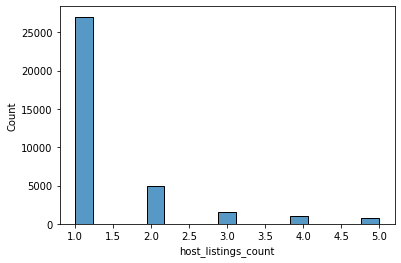

In [43]:
sns.histplot(data=pruned_paris_df, x='host_listings_count')

<AxesSubplot:xlabel='accommodates', ylabel='accommodates'>

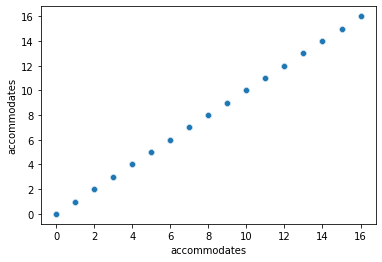

In [44]:
sns.scatterplot(data=pruned_paris_df, x="accommodates", y="accommodates")

<AxesSubplot:xlabel='accommodates', ylabel='Count'>

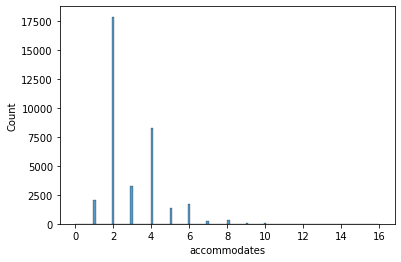

In [45]:
sns.histplot(data=pruned_paris_df, x='accommodates')

In [46]:
pruned_paris_df = pruned_paris_df[(pruned_paris_df['accommodates'] <= 6) & (pruned_paris_df['accommodates'] > 0)]

<AxesSubplot:xlabel='beds', ylabel='beds'>

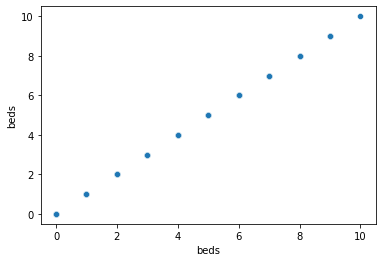

In [47]:
sns.scatterplot(data=pruned_paris_df, x="beds", y="beds")

<AxesSubplot:xlabel='beds', ylabel='Count'>

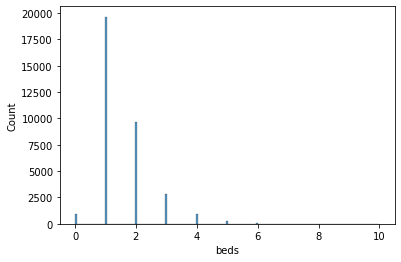

In [48]:
sns.histplot(data=pruned_paris_df, x='beds')

In [49]:
pruned_paris_df = pruned_paris_df[(pruned_paris_df['beds'] <= 4) & (pruned_paris_df['beds'] >= 0)]

<AxesSubplot:xlabel='price', ylabel='price'>

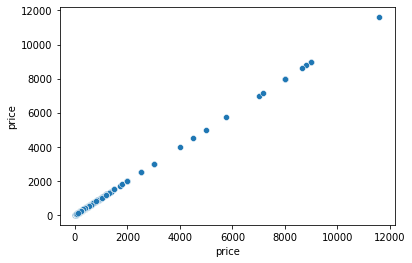

In [50]:
sns.scatterplot(data=pruned_paris_df, x="price", y="price")

<AxesSubplot:xlabel='price', ylabel='Count'>

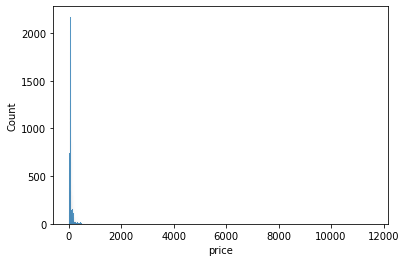

In [51]:
sns.histplot(data=pruned_paris_df, x='price')

In [52]:
pruned_paris_df = pruned_paris_df[(pruned_paris_df['price'] <= 300) & (pruned_paris_df['price'] > 0)]

<AxesSubplot:xlabel='minimum_nights', ylabel='minimum_nights'>

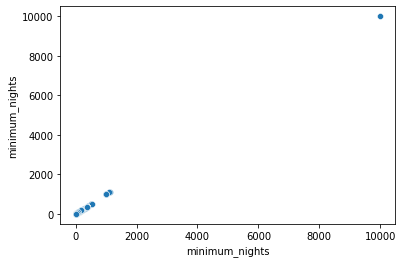

In [53]:
sns.scatterplot(data=pruned_paris_df, x="minimum_nights", y="minimum_nights")

<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

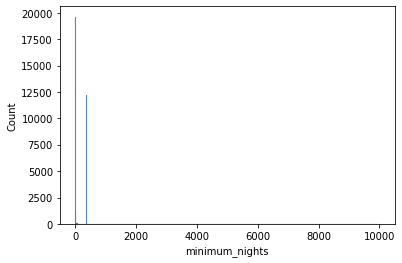

In [54]:
sns.histplot(data=pruned_paris_df, x='minimum_nights')

In [55]:
pruned_paris_df = pruned_paris_df[(pruned_paris_df['minimum_nights'] <= 366) & (pruned_paris_df['minimum_nights'] > 0)]

<AxesSubplot:xlabel='maximum_nights', ylabel='maximum_nights'>

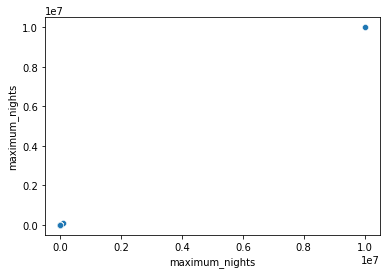

In [56]:
sns.scatterplot(data=pruned_paris_df, x="maximum_nights", y="maximum_nights")

In [57]:
paris_df['maximum_nights'].describe()

count    4.963400e+04
mean     1.000286e+03
std      4.488877e+04
min      1.000000e+00
25%      2.000000e+02
50%      1.125000e+03
75%      1.125000e+03
max      1.000000e+07
Name: maximum_nights, dtype: float64

In [58]:
pruned_paris_df = pruned_paris_df[(pruned_paris_df['maximum_nights'] <= 1125) & (pruned_paris_df['maximum_nights'] > 0)]

<AxesSubplot:xlabel='maximum_nights', ylabel='Count'>

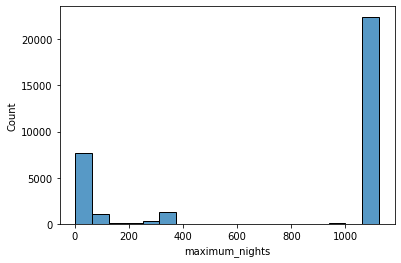

In [59]:
sns.histplot(data=pruned_paris_df, x='maximum_nights')

<AxesSubplot:xlabel='number_of_reviews', ylabel='number_of_reviews'>

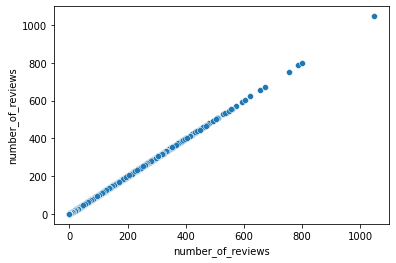

In [60]:
sns.scatterplot(data=pruned_paris_df, x="number_of_reviews", y="number_of_reviews")

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

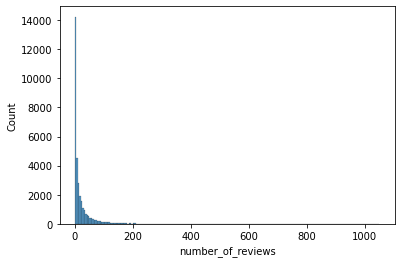

In [61]:
sns.histplot(data=pruned_paris_df, x='number_of_reviews', binwidth=5)

In [62]:
pruned_paris_df = pruned_paris_df[(pruned_paris_df['number_of_reviews'] <= 200) & (pruned_paris_df['number_of_reviews'] > 0)]

<AxesSubplot:xlabel='number_of_reviews_ltm', ylabel='number_of_reviews_ltm'>

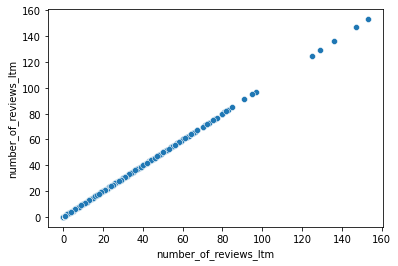

In [63]:
sns.scatterplot(data=pruned_paris_df, x="number_of_reviews_ltm", y="number_of_reviews_ltm")

<AxesSubplot:xlabel='number_of_reviews_ltm', ylabel='Count'>

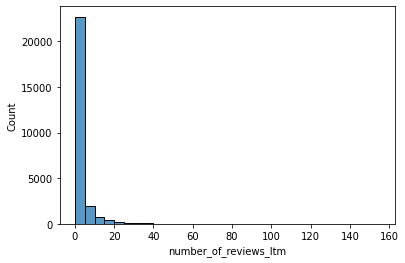

In [64]:
sns.histplot(data=pruned_paris_df, x='number_of_reviews_ltm', binwidth=5)

In [65]:
pruned_paris_df = pruned_paris_df[(pruned_paris_df['number_of_reviews_ltm'] <= 90) & (pruned_paris_df['number_of_reviews_ltm'] > 0)]

<AxesSubplot:xlabel='number_of_reviews_l30d', ylabel='number_of_reviews_l30d'>

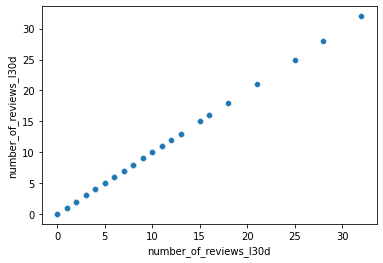

In [66]:
sns.scatterplot(data=pruned_paris_df, x="number_of_reviews_l30d", y="number_of_reviews_l30d")

<AxesSubplot:xlabel='number_of_reviews_l30d', ylabel='Count'>

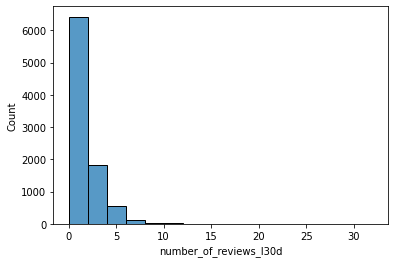

In [67]:
sns.histplot(data=pruned_paris_df, x='number_of_reviews_l30d', binwidth=2)

keeping 'number_of_reviews_l30d' untouched intentionally, as scatterplot doesn't show that extremely far outliers as for other variables

<AxesSubplot:xlabel='host_days', ylabel='host_days'>

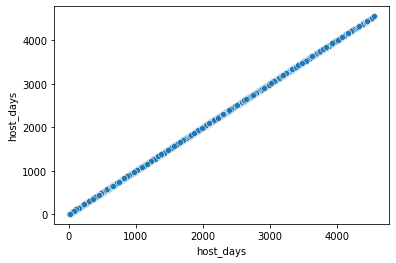

In [68]:
sns.scatterplot(data=pruned_paris_df, x="host_days", y="host_days")

<AxesSubplot:xlabel='host_days', ylabel='Count'>

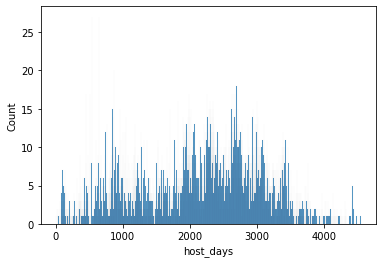

In [69]:
sns.histplot(data=pruned_paris_df, x='host_days', binwidth=2)

In [70]:
# some of the columns were calculated for entire dataset and their values will be untrue for the pruned dataset, so they'll
# be removed
# removing location columns, as they're not transformed into district names
# removing id, as it's kept in orginal dataframe
columns_to_drop = [
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'latitude', 'longitude',
    'id'
]

In [71]:
pruned_paris_df.drop(columns=columns_to_drop, inplace=True)

In [72]:
# investigating variables in the model
pruned_paris_df.describe()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,local_host,entire_home_apt,hotel_room,private_room,shared_room,host_days
count,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000
mean,0.315344,1.557472,0.895404,2.810393,1.526316,101.040837,20.627128,619.082341,38.362412,6.548125,1.142984,0.283632,0.757761,0.857572,0.017692,0.121731,0.003004,2145.207077
std,0.464679,1.010135,0.306049,1.226466,0.821785,52.736983,73.614330,521.850294,41.147916,8.738325,1.692906,0.450785,0.428462,0.349508,0.131838,0.326994,0.054733,928.054909
min,0.000000,1.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,65.000000,2.000000,30.000000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1434.000000
50%,0.000000,1.000000,1.000000,2.000000,1.000000,89.000000,3.000000,1124.000000,23.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2281.000000
75%,1.000000,2.000000,1.000000,4.000000,2.000000,125.000000,5.000000,1125.000000,54.000000,8.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2837.000000
max,1.000000,5.000000,1.000000,6.000000,4.000000,300.000000,365.000000,1125.000000,200.000000,85.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4549.000000


In [73]:
# checking correlations between numerical variables
num_variables = [
    'host_listings_count', 'accommodates', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'host_days'
]
binary_variables = [
    'host_is_superhost', 'host_identity_verified', 'instant_bookable', 'local_host', 'entire_home_apt', 'hotel_room', 
    'private_room', 'shared_room'
]

Wall time: 15.2 s


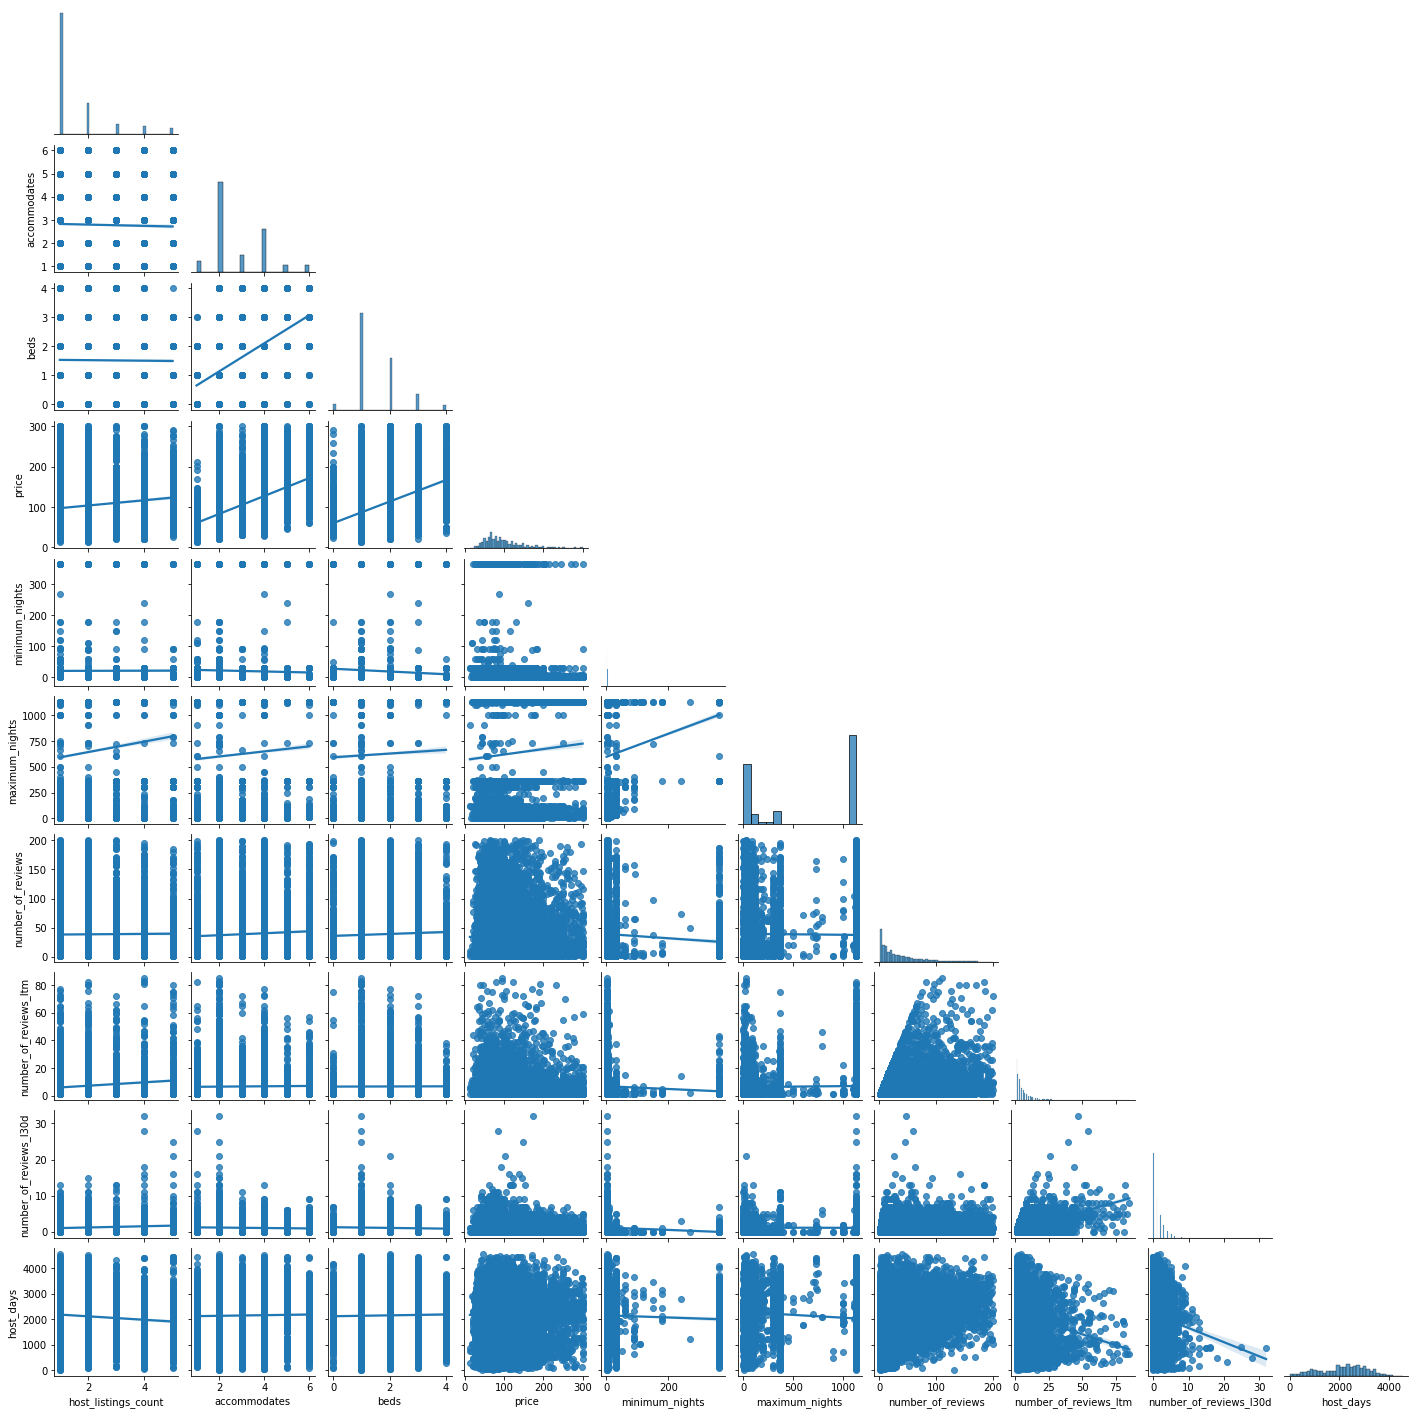

In [74]:
%%time
sns.pairplot(pruned_paris_df[num_variables], height=2, corner=True, kind='reg')

In [75]:
pruned_paris_df[num_variables].corr()

,host_listings_count,accommodates,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,host_days
host_listings_count,1.000000,-0.022462,-0.011642,0.125017,0.002704,0.099236,0.008542,0.143206,0.101170,-0.073941
accommodates,-0.022462,1.000000,0.723739,0.516641,-0.027496,0.058023,0.050024,0.017247,-0.042951,0.016550
beds,-0.011642,0.723739,1.000000,0.415545,-0.049479,0.028521,0.033186,0.004794,-0.048580,0.015236
price,0.125017,0.516641,0.415545,1.000000,-0.091414,0.053524,0.062268,0.023229,0.033986,-0.017855
minimum_nights,0.002704,-0.027496,-0.049479,-0.091414,1.000000,0.157741,-0.065918,-0.084923,-0.145403,-0.032943
maximum_nights,0.099236,0.058023,0.028521,0.053524,0.157741,1.000000,-0.021853,0.041338,-0.014884,-0.125816
number_of_reviews,0.008542,0.050024,0.033186,0.062268,-0.065918,-0.021853,1.000000,0.350798,0.255489,0.219497
number_of_reviews_ltm,0.143206,0.017247,0.004794,0.023229,-0.084923,0.041338,0.350798,1.000000,0.533333,-0.159538
number_of_reviews_l30d,0.101170,-0.042951,-0.048580,0.033986,-0.145403,-0.014884,0.255489,0.533333,1.000000,-0.100639
host_days,-0.073941,0.016550,0.015236,-0.017855,-0.032943,-0.125816,0.219497,-0.159538,-0.100639,1.000000


In [76]:
ladata = pd.crosstab(pruned_paris_df[binary_variables[0]], pruned_paris_df[binary_variables[1]])
ladata = np.array(ladata)
ladata

array([[ 729, 5424],
       [ 211, 2623]], dtype=int64)

displaying Cramér's V association between nominal variables 

In [77]:
def cramer_matrix(dataframe, variables):
    matrix = np.empty((0, len(variables)), float)
    rcnt = 0
    
    for rcnt in range(0, len(variables)):
        row = np.empty((1, 0), float)
        ccnt = 0
        for ccnt in range(0, len(variables)):
            ctab = pd.crosstab(dataframe[variables[rcnt]], pruned_paris_df[variables[ccnt]])
            ctab = np.array(ctab)
            X2 = stats.chi2_contingency(ctab, correction=False)[0]
            n = np.sum(ctab)
            minDim = min(ctab.shape) - 1
            CramerV = np.sqrt((X2 / n) / minDim)
            CramerV = np.array(CramerV)
            row = np.column_stack((row, CramerV))
            ccnt =+ 1
        matrix = np.append(matrix, row, axis=0)
        rcnt =+ 1
        
    matrix_df = pd.DataFrame(matrix, index=variables, columns=variables)
        
    return matrix_df

Wall time: 2.25 s


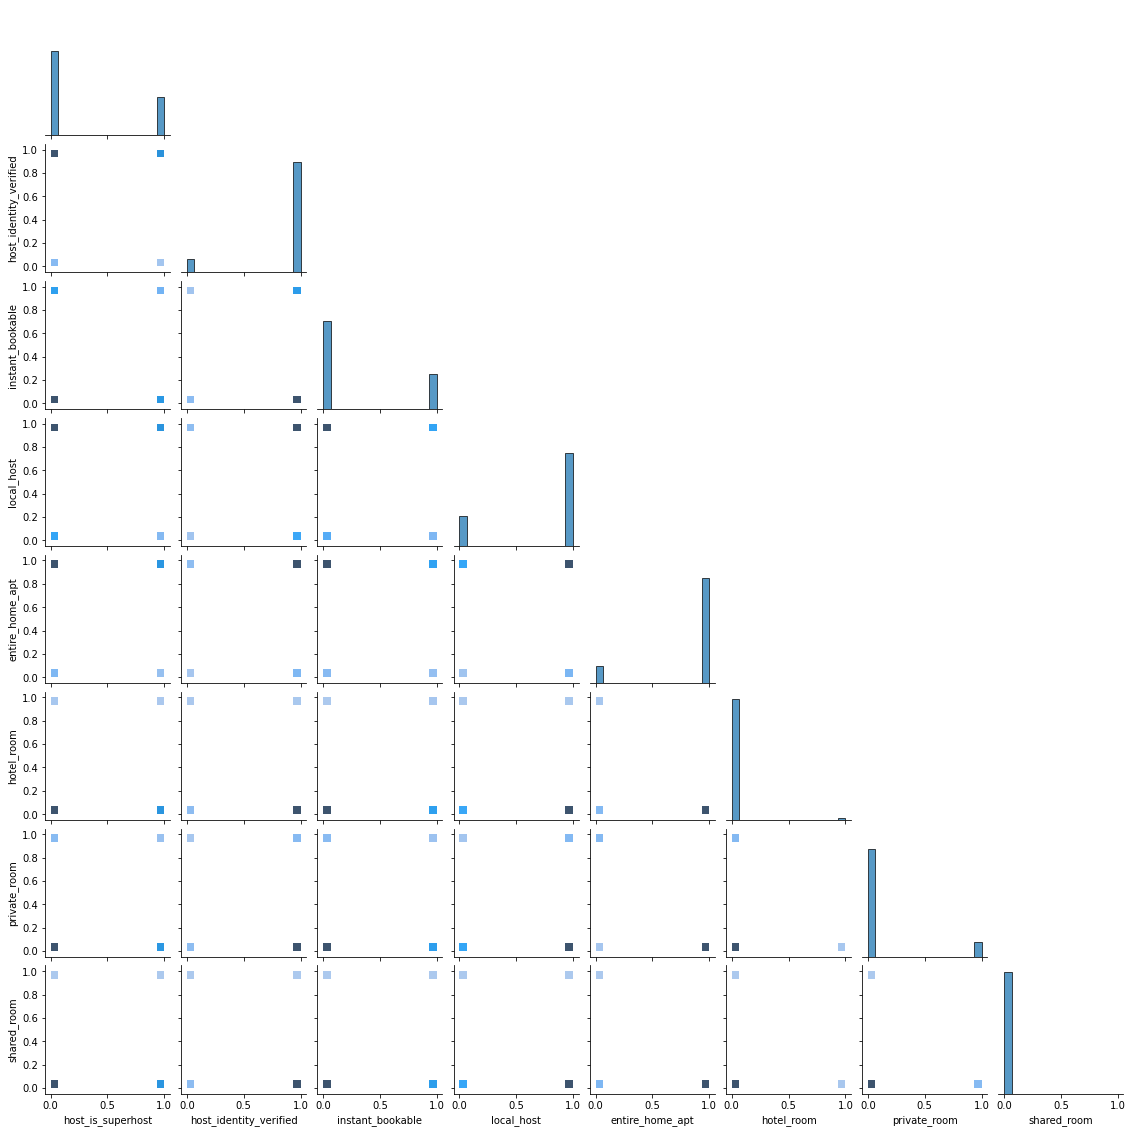

In [78]:
%%time
sns.pairplot(data=pruned_paris_df, x_vars=binary_variables, y_vars=binary_variables, height=2, corner=True, kind='hist')

In [79]:
CramerVmatrix = cramer_matrix(pruned_paris_df, binary_variables)
CramerVmatrix

,host_is_superhost,host_identity_verified,instant_bookable,local_host,entire_home_apt,hotel_room,private_room,shared_room
host_is_superhost,1.000000,0.066845,0.039413,0.019845,0.022858,0.023869,0.033700,0.002125
host_identity_verified,0.066845,1.000000,0.015015,0.032500,0.047979,0.056180,0.027325,0.007812
instant_bookable,0.039413,0.015015,1.000000,0.125913,0.114391,0.205794,0.036772,0.015074
local_host,0.019845,0.032500,0.125913,1.000000,0.012682,0.048235,0.034162,0.006926
entire_home_apt,0.022858,0.047979,0.114391,0.012682,1.000000,0.329310,0.913535,0.134699
hotel_room,0.023869,0.056180,0.205794,0.048235,0.329310,1.000000,0.049964,0.007367
private_room,0.033700,0.027325,0.036772,0.034162,0.913535,0.049964,1.000000,0.020437
shared_room,0.002125,0.007812,0.015074,0.006926,0.134699,0.007367,0.020437,1.000000


displaying linear correlation coefficient matrix between nominal and numerical variable pairs

In [80]:
def linear_reg(dataframe, variables_1, variables_2):
    matrix = np.empty((0, len(variables_1)), float)
    rcnt = 0
    
    for rcnt in range(0, len(variables_2)):
        row = np.empty((1, 0), float)
        ccnt = 0
        for ccnt in range(0, len(variables_1)):
            regression = stats.linregress(dataframe[variables_2[rcnt]], pruned_paris_df[variables_1[ccnt]])
            row = np.column_stack((row, regression.rvalue))
            ccnt =+ 1
        matrix = np.append(matrix, row, axis=0)
        rcnt =+ 1
        
    matrix_df = pd.DataFrame(matrix, index=variables_2, columns=variables_1)
        
    return matrix_df

Wall time: 4.25 s


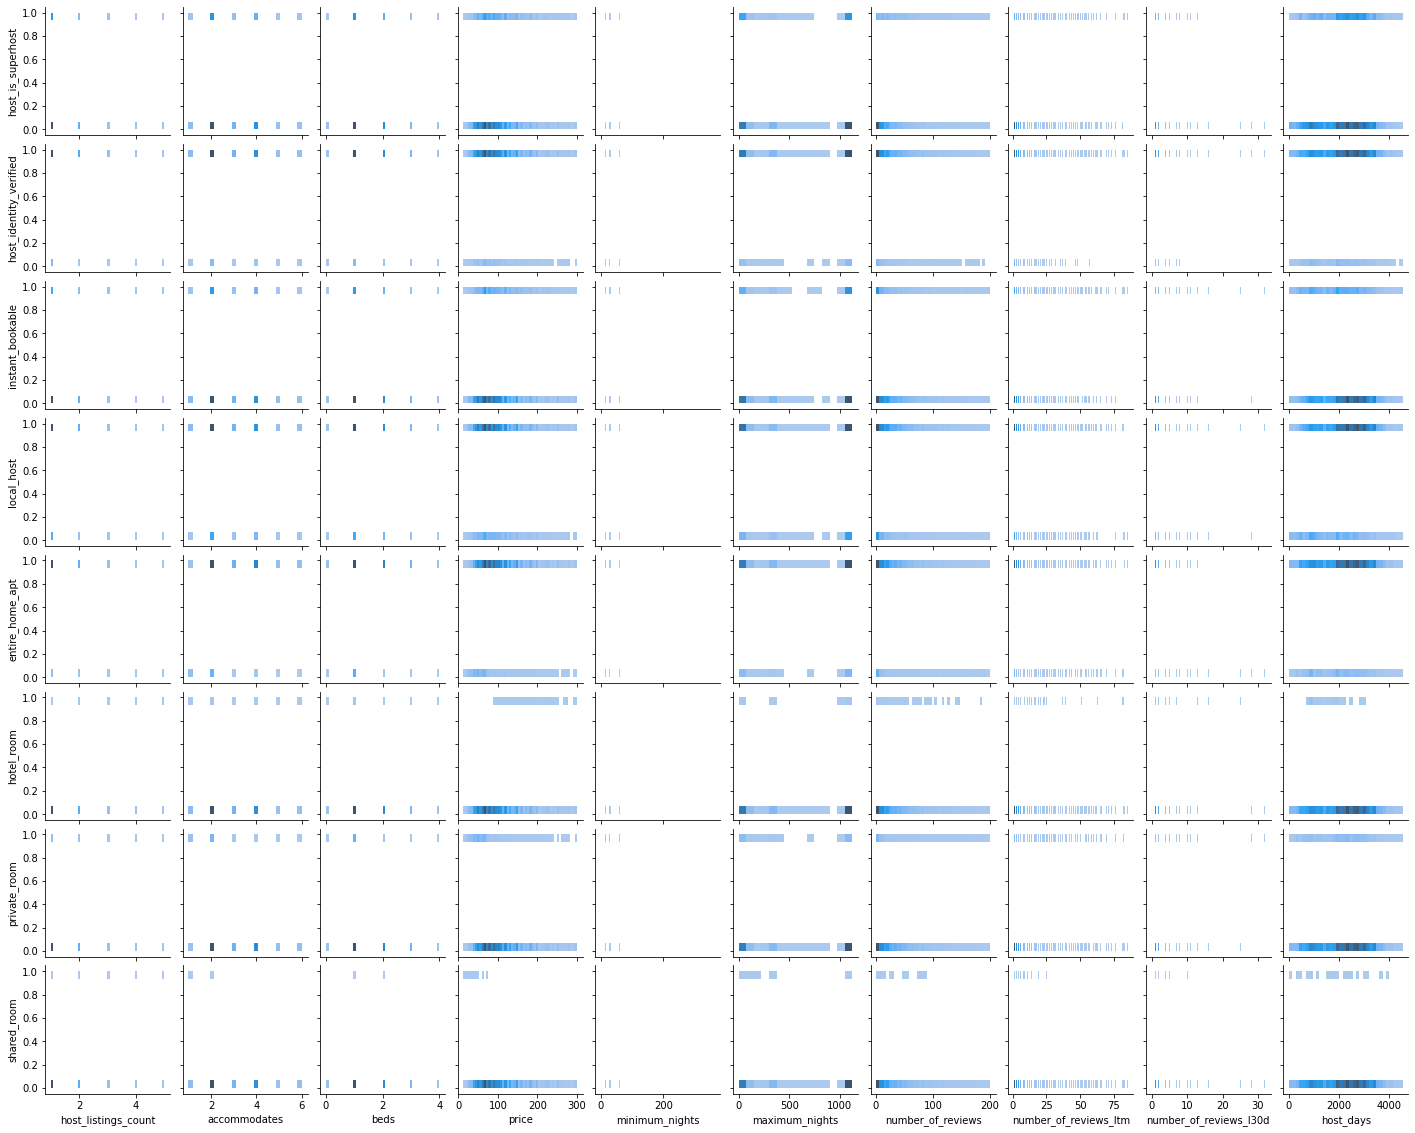

In [81]:
%%time
sns.pairplot(data=pruned_paris_df, x_vars=num_variables, y_vars=binary_variables, height=2, kind='hist')

In [82]:
LinearRmatrix = linear_reg(pruned_paris_df, binary_variables, num_variables)
LinearRmatrix

,host_is_superhost,host_identity_verified,instant_bookable,local_host,entire_home_apt,hotel_room,private_room,shared_room
host_listings_count,0.044601,0.052204,0.235594,-0.123775,-0.238750,0.293609,0.131101,0.034114
accommodates,0.015298,0.043810,0.016567,-0.016259,0.291101,-0.073540,-0.270983,-0.062799
beds,0.018191,0.028202,-0.001976,-0.005123,0.175393,-0.047952,-0.165565,-0.015366
price,0.112154,0.046764,0.096571,-0.038095,0.149274,0.160595,-0.213407,-0.065084
minimum_nights,-0.074614,-0.005673,0.005619,-0.046184,0.091119,-0.023148,-0.085671,-0.014278
maximum_nights,-0.020316,-0.002565,0.071817,-0.060588,0.014614,0.087362,-0.043205,-0.045629
number_of_reviews,0.242507,0.082657,0.033803,0.038750,-0.035039,-0.040158,0.055336,-0.010119
number_of_reviews_ltm,0.170540,0.055811,0.152890,-0.068979,-0.050444,0.014475,0.048346,-0.001582
number_of_reviews_l30d,0.144546,0.042400,0.136570,-0.052121,-0.120180,0.048498,0.104852,0.024188
host_days,0.084436,0.093425,-0.178611,0.253339,0.073483,-0.106524,-0.031500,-0.024458
